# #002 How does bitcoin price changes over time?

Recently I was wondering how bitcon price varies over time. The best way to answer this question will be to look at the data!

## Data wrangling

First we need to set some fundamental assumption. As we are analysing currency price we need to do it against some other currency. That is how this market works. I choose the most obvious option - price of bitcoin against United States dollar (USD). I treat it as basic assumption for further analysis.

So let's get the data. Quandl is an platform offering essential financial and economic data sets. And instead of just downloading the csv file Quandl offers Bitcoin exchange rates via free API which we will use. Thanks to that the data will be updated with future prices data when running this Jupyter notebook.

Let's start by installing Quandl module first. Since I am using Anaconda Python distribution, I do it by simply running ```conda install quandl``` in my terminal. Next step will be creating simple tooling function responsible for connecting to Quandl API and getting the data we are interested in.

In [53]:
import pandas as pd
import quandl

Let's write helper function to get and save data from Quandl to a file.

In [54]:
def get_quandl_data(data_code, path):
    """
    Downloading Quandl data for given data code and saving it to a file.
    """
    try:
        data = quandl.get(data_code)
    except Exception as e:
        print("Error!", e)
        data = None
    if isinstance(data, pd.DataFrame):
        data.to_csv(path)

And get the actual data.

In [57]:
data_path = "data/2_bitcoin_prices/prices.csv"

get_quandl_data("BCHARTS/KRAKENUSD", data_path)

Now we can read it from csv file.

In [59]:
bitcoin_df = pd.read_csv(data_path)

## Data exploration

Let's see basic features of created data set.

In [62]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
1,2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2,2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
3,2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
4,2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [63]:
bitcoin_df.tail()

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
1373,2017-10-11,4745.4,4878.0,4710.2,4822.6,3619.274645,1.738064e+07,4802.244410
1374,2017-10-12,4824.2,5430.0,4812.2,5429.7,7950.666610,4.103676e+07,5161.424147
1375,2017-10-13,5429.8,5854.4,5380.1,5640.0,9222.144339,5.178706e+07,5615.511555
1376,2017-10-14,5626.7,5800.0,5556.1,5800.0,3019.946476,1.719205e+07,5692.831135
1377,2017-10-15,5800.0,5840.4,5462.1,5690.1,4298.089515,2.409953e+07,5607.033176


In [64]:
bitcoin_df.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume (BTC)         float64
Volume (Currency)    float64
Weighted Price       float64
dtype: object

In [68]:
bitcoin_df.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1.378000e+03,1378.000000
mean,820.184319,845.854381,795.559261,823.701844,1423.628083,3.006124e+06,821.079221
std,966.618879,1004.081761,933.315635,975.423012,2591.654931,7.689900e+06,968.785739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,296.955610,311.939293,289.091775,299.988803,11.971741,4.716352e+03,298.552371
50%,500.550005,524.864860,485.447500,504.169215,105.639015,3.122067e+04,498.990956
75%,768.290250,775.855250,755.445500,767.079130,1563.924553,1.085268e+06,767.098167
max,5800.000000,5854.400000,5556.100000,5800.000000,21846.766955,7.435428e+07,5692.831135


We can see that we have 1378 bitcoin price data points collected from 2014-01-07 to 2017-10-15 (as of day of this analysis). We have also several price measure points. The one to answer this analysis question seems to be closing price (`Close` column) and we will use it in further analysis.

## Conclusions and answer

We want to answe following question: how does bitcoin price changes over time? To do, based on data exploration, we decided to use daily closing price of bitcoin unit versus dollar. 

Let's plot and see how data distribution shape looks like.

In [77]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
%matplotlib inline

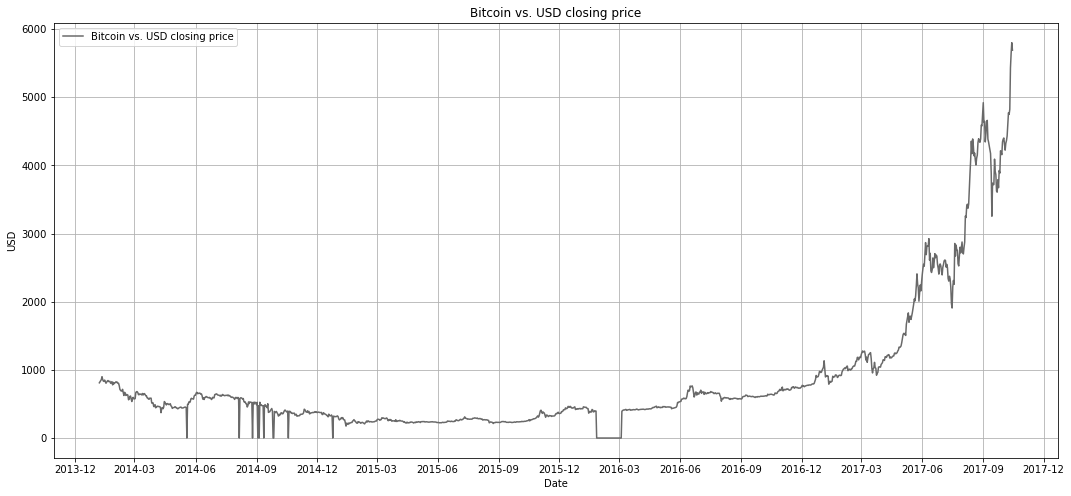

In [97]:
fig, axes = plt.subplots(figsize=(18, 8))
# axes.plot(bitcoin_df["Close"])
months = MonthLocator(range(1, 13), bymonthday=1, interval=3)
monthsFmt = DateFormatter("%Y-%m")
axes.set_title("Bitcoin vs. USD closing price")
axes.plot_date(bitcoin_df['Date'], bitcoin_df["Close"], fmt='m', color="dimgrey", label="Bitcoin vs. USD closing price")
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(monthsFmt)
axes.set_xlabel("Date")
axes.set_ylabel("USD")
axes.grid(True, which='major')
axes.legend(loc=0)

We see that the overall trend in bitcoin price is growing with its values exploding rapidly in recent 6 months.

Let's have a closer look at specific data characteristics.

In [67]:
bitcoin_df["Close"].describe()

count    1378.000000
mean      823.701844
std       975.423012
min         0.000000
25%       299.988803
50%       504.169215
75%       767.079130
max      5800.000000
Name: Close, dtype: float64

So for overall analyzed period of time (2014-01-07 to 2017-10-15) the mean bitcoing vs. dollar price is \$823.7 with very large variance of \$975.4. Median price is \$504.17. 

The minimal price was \$0.0 (!) and maximal price was $5800. Let's see when did this happend and investigate possible reasons.

On the plot we can see that \$0.00 price was reached several times. Why and when?






What about the the maximal price?

One cannot analyze just the maximal price without looking at the reason for this rapid price growth from March 2017 to October 2017, resulting in reaching current maximal price.